In [3]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
import numpy as np
import matplotlib.pyplot as plt
from math import pi

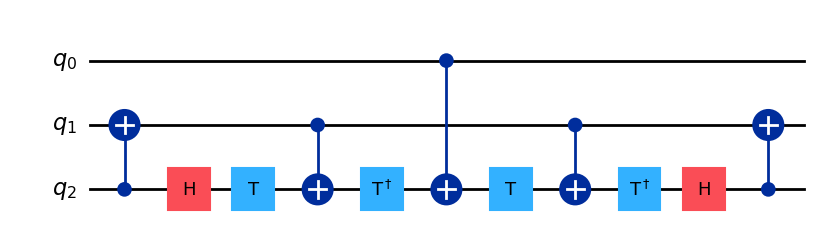

In [5]:
# Relative Fredkin gate used in our paper
rfred = QuantumCircuit(3)
rfred.cx(2,1)
rfred.h(2)
rfred.t(2)
rfred.cx(1,2)
rfred.tdg(2)
rfred.cx(0,2)
rfred.t(2)
rfred.cx(1,2)
rfred.tdg(2)
rfred.h(2)
rfred.cx(2,1)
rfred.draw('mpl')

In [7]:
# Operators used for QSM: N = 8, M = 2
# Data(L): "00110000", Pattern(P): "11" 
# Operator a: Initialization Operator
c1 = QuantumCircuit(11)
c1.append(rfred, [2,3,4])
c1.append(rfred, [2,5,6])
c1.append(rfred, [2,7,8])
c1.append(rfred, [2,9,10])
c1.append(rfred, [2,4,6])
c1.append(rfred, [2,8,10])
c1.append(rfred, [2,6,10])

c2 = QuantumCircuit(11)
c2.append(rfred, [1,3,5])
c2.append(rfred, [1,4,6])
c2.append(rfred, [1,7,9])
c2.append(rfred, [1,8,10])
c2.append(rfred, [1,5,9])
c2.append(rfred, [1,6,10])


c4 = QuantumCircuit(11)
c4.append(rfred, [0,3,7])
c4.append(rfred, [0,4,8])
c4.append(rfred, [0,5,9])
c4.append(rfred, [0,6,10])

a = QuantumCircuit(13)
a.h([0,1,2])
a.x([5,6]) # L = 00110000
a.x([11,12]) # P = 11
a.append(c4, range(11))
a.append(c2, range(11))
a.append(c1, range(11))
a.cx(3,11)
a.cx(4,12)

# Operator a_inv: Inverse of Initialization Operator
c1_inv = QuantumCircuit(11)
c1_inv.append(rfred, [2, 6, 10])
c1_inv.append(rfred, [2, 8, 10])
c1_inv.append(rfred, [2, 4, 6])
c1_inv.append(rfred, [2, 9, 10])
c1_inv.append(rfred, [2, 7, 8])
c1_inv.append(rfred, [2, 5, 6])
c1_inv.append(rfred, [2, 3, 4])

c2_inv = QuantumCircuit(11)
c2_inv.append(rfred, [1, 6, 10])
c2_inv.append(rfred, [1, 5, 9])
c2_inv.append(rfred, [1, 8, 10])
c2_inv.append(rfred, [1, 7, 9])
c2_inv.append(rfred, [1, 4, 6])
c2_inv.append(rfred, [1, 3, 5])


c4_inv = QuantumCircuit(11)
c4_inv.append(rfred, [0, 6, 10])
c4_inv.append(rfred, [0, 5, 9])
c4_inv.append(rfred, [0, 4, 8])
c4_inv.append(rfred, [0, 3, 7])

a_inv = QuantumCircuit(13)
a_inv.cx(4,12)
a_inv.cx(3,11)
a_inv.append(c1_inv, range(11))
a_inv.append(c2_inv, range(11))
a_inv.append(c4_inv, range(11))
a_inv.x([11,12]) # P = 11
a_inv.x([5,6]) # L = 00110000
a_inv.h([0,1,2])

# Operaotr q: Grover Operator
q = QuantumCircuit(13)
q.x([11,12])
q.cz(11,12)
q.x([11,12]) # R_g
q.append(a_inv, range(13))
q.x([0,1,2])
q.ccz(0,1,2)
q.x([0,1,2]) # R_0
q.append(a, range(13))

In [17]:
# Grover algorithm with n iteration
def grover(n):
    grover = QuantumCircuit(13,5)
    grover.append(a, range(13))
    for i in range(n):
        grover.append(q, range(13))
    grover.measure(0,0)
    grover.measure(1,1)
    grover.measure(2,2)
    grover.measure(11,3)
    grover.measure(12,4)
    return grover

In [19]:
# QSM on Qiksit Sampler using 0 to 9 Grover iterations
# "00010" is the solution.
sampler = StatevectorSampler()
prob_grov = []
for i in range(10):
    job = sampler.run([grover(i)], shots=10000)
    result = job.result()
    pub_result = result[0]
    data = pub_result.data.c.get_counts()
    print(f"{i}: {data}")
    prob_grov.append(data.get('00010'))
    
prob_grov = np.array(prob_grov) / 10000
print(prob_grov)

0: {'00010': 1238, '11000': 1256, '10110': 1234, '11001': 1281, '11101': 1257, '11011': 1208, '11111': 1239, '01100': 1287}
1: {'00010': 7850, '11001': 277, '11011': 324, '11101': 323, '11111': 321, '11000': 349, '01100': 277, '10110': 279}
2: {'00010': 9457, '11111': 93, '11101': 63, '01100': 71, '11011': 77, '11001': 80, '11000': 69, '10110': 90}
3: {'00010': 3301, '11000': 903, '11011': 968, '11001': 1025, '10110': 928, '01100': 953, '11111': 932, '11101': 990}
4: {'10110': 1410, '01100': 1407, '11101': 1385, '11001': 1370, '11011': 1478, '11000': 1377, '11111': 1448, '00010': 125}
5: {'11000': 673, '00010': 5488, '10110': 629, '11001': 632, '11111': 649, '11011': 665, '01100': 607, '11101': 657}
6: {'00010': 9998, '10110': 1, '01100': 1}
7: {'00010': 5835, '01100': 580, '11101': 593, '11011': 633, '11111': 594, '11001': 609, '10110': 592, '11000': 564}
8: {'10110': 1434, '11000': 1485, '11011': 1362, '01100': 1345, '11001': 1404, '11111': 1416, '11101': 1350, '00010': 204}
9: {'111

In [23]:
# Theoretical probability of Grover search working correctly
theta = np.arcsin((1/8)**(1/2))
prob_theory = []
for k in range(10):
    x = np.sin((2*k+1)*theta)
    prob_theory.append(x**2)
prob_theory = np.array(prob_theory)
print(prob_theory)

[0.125      0.78125    0.9453125  0.33007812 0.01220703 0.54797363
 0.99978638 0.57697296 0.01945686 0.30289125]


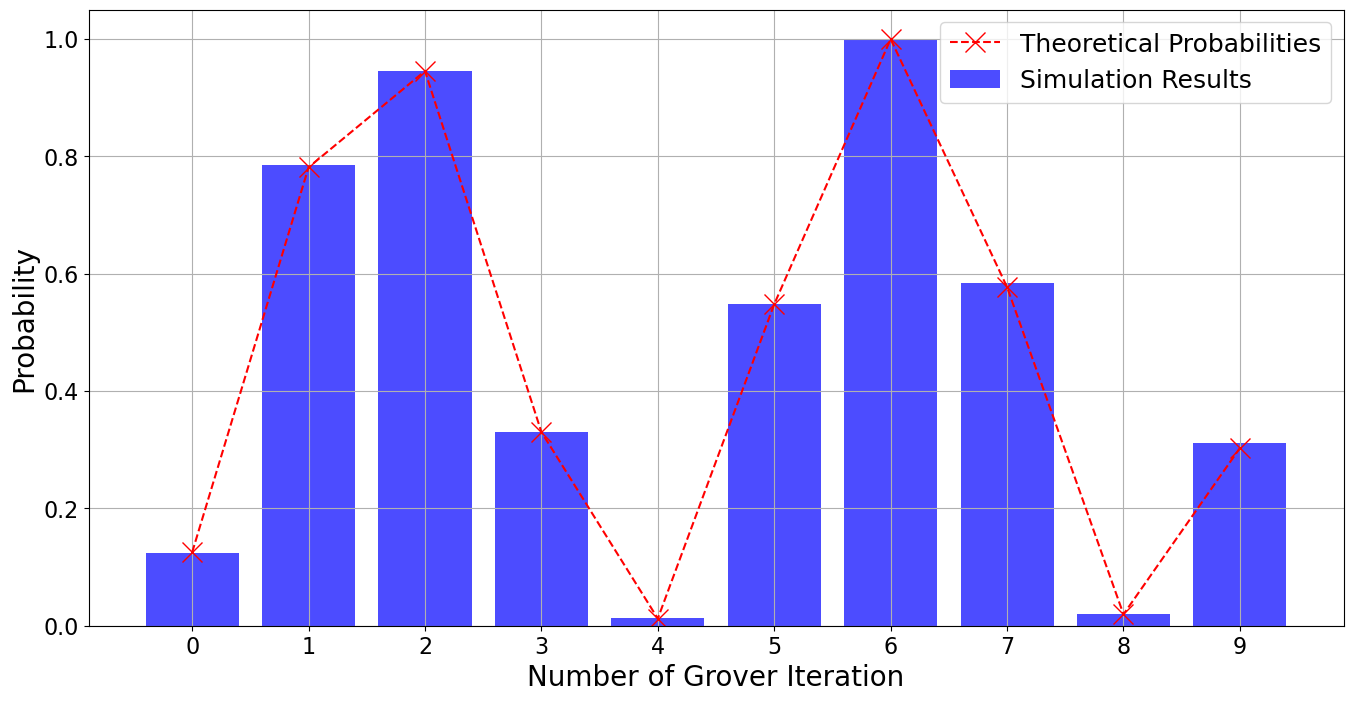

In [25]:
# Comparison of the theoretical probability of Grover search with the probability of QSM simulation using the relative-phase Fredkin Gate

plt.figure(figsize=(10, 8))
x_grov = np.arange(len(prob_grov))
x_theory = np.arange(len(prob_theory))

# prob_grov: Measurement results of QSM with relative-phase Fredkin gate
plt.bar(x_grov, prob_grov, label='Simulation Results', color='b', alpha=0.7)

# prob_theory: Theoretical probability of Grover search working correctly
plt.plot(x_theory, prob_theory, label= 'Theoretical Probabilities', marker='x', linestyle='--', color='r', markersize=15)

# Increase label sizes and move legend
plt.xlabel('Number of Grover Iteration', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.xticks(ticks=np.arange(max(len(prob_grov), len(prob_theory))), fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=18)
plt.grid(True)
plt.subplots_adjust(right=1.38)
plt.show()